# MacDonalds

In [ ]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
sns.set()

In [8]:
df = pd.read_csv('D:\SF\McD_vs_Stbs/new_mac_data.csv', encoding='utf-8')

In [9]:
df.head()

,Unnamed: 0,Category,Item,Weight,Protein,Fat,Carbon,Energy,Сomposition,Allergens
0,0,Сэндвичи,Биг Мак,210.0,26.0,25.0,42.0,2106 / 503,"['Булочка с кунжутом Биг Мак, поджаренная в то...","глютен, молоко, яйцо, горчица, кунжут. Может ..."
1,1,Сэндвичи,Гамбургер,99.0,13.0,8.5,30.0,1063 / 253,"['Булочка для гамбургеров, поджаренная в тосте...","глютен, горчица."
2,2,Сэндвичи,Чикенбургер,128.0,12.0,15.0,37.0,1422 / 339,"['Булочка для гамбургеров, поджаренная в тосте...","глютен, яйцо, горчица."
3,3,Сэндвичи,Биг Тейсти,340.0,44.0,50.0,50.0,3457 / 828,"['Бифштекс из говядины рубленый 110 г, пригото...","глютен, яйцо, молоко, кунжут. Может содержать..."
4,4,Сэндвичи,Роял Де Люкс,247.0,31.0,31.0,38.0,2336 / 559,"['Бифштекс из говядины рубленый 80 г, приготов...","глютен, кунжут, молоко, горчица, яйцо. Может ..."


# Предобработка

In [6]:
#Выпишем все ингредиенты
ingredients = set()
for composition in df['Сomposition']:
    for ingredient in composition[2:-2].split("\', \'"):
        #print(ingredient)
        ingredients.add(ingredient)


Булочка с кунжутом Биг Мак, поджаренная в тостере
Бифштексы из говядины рубленые 34 г, приготовленные на гриле и приправленные смесью соли и перца
Салат "Айсберг мелкой нарезки"
Соус на основе растительных масел Биг-Мак
Плавленый сыр Чеддер
Огурцы маринованные резанные
Лук репчатый резаный восстановленный
Булочка для гамбургеров, поджаренная в тостере
Бифштекс из говядины рубленый 34 г, приготовленный на гриле и приправленный смесью соли и перца
Кетчуп томатный
Огурцы маринованные резанные
Лук репчатый резаный восстановленный
Горчичный соус
Булочка для гамбургеров, поджаренная в тостере
Котлета куриная Велью, приготовленная во фритюре
Соус на основе растительных масел МакЧикен
Салат "Айсберг мелкой нарезки"
Бифштекс из говядины рубленый 110 г, приготовленный на гриле и приправленный смесью соли и перца
Булочка для гамбургеров Биг Тести
Плавленый сыр со вкусом Эмменталь
Помидор свежий резаный
Соус на основе растительных масел Биг Тэйсти
Салат "Айсберг крупной нарезки"
Лук репчатый свежи

In [10]:
# Разделим колонку с Энергией на две в Джоулях и Калориях
df['Energy, kJ'] = df['Energy'].apply(lambda x: x.split('/')[0]) # значение в кДж первое

# получаем значение в калориях (второе), но могут быть ячейки с "0", поэтому проверяем длину полученого списка
def kal(cell):
    if len(cell.split('/'))>1:
        return cell.split('/')[1]
    else:
        return cell.split('/')[0]
    
df['Energy, kal'] = df['Energy'].apply(lambda x: kal(x))
df.head()

In [11]:
# удалим ячейку с общей энергией
df = df.drop('Energy', axis=1)

,Unnamed: 0,Category,Item,Weight,Protein,Fat,Carbon,Energy,Сomposition,Allergens,"Energy, kJ"
0,0,Сэндвичи,Биг Мак,210.0,26.0,25.0,42.0,2106 / 503,"['Булочка с кунжутом Биг Мак, поджаренная в то...","глютен, молоко, яйцо, горчица, кунжут. Может ...",2106
1,1,Сэндвичи,Гамбургер,99.0,13.0,8.5,30.0,1063 / 253,"['Булочка для гамбургеров, поджаренная в тосте...","глютен, горчица.",1063
2,2,Сэндвичи,Чикенбургер,128.0,12.0,15.0,37.0,1422 / 339,"['Булочка для гамбургеров, поджаренная в тосте...","глютен, яйцо, горчица.",1422
3,3,Сэндвичи,Биг Тейсти,340.0,44.0,50.0,50.0,3457 / 828,"['Бифштекс из говядины рубленый 110 г, пригото...","глютен, яйцо, молоко, кунжут. Может содержать...",3457
4,4,Сэндвичи,Роял Де Люкс,247.0,31.0,31.0,38.0,2336 / 559,"['Бифштекс из говядины рубленый 80 г, приготов...","глютен, кунжут, молоко, горчица, яйцо. Может ...",2336


In [13]:
# запишем файл на всякий случай
df.to_csv('D:\SF\McD_vs_Stbs/new_mac_data_2.csv', index = False)

In [2]:
df2 = pd.read_csv('D:\SF\McD_vs_Stbs/new_mac_data_2.csv', encoding='utf-8')
df2.head()

,Unnamed: 0,Unnamed: 0.1,Category,Item,Weight,Protein,Fat,Carbon,Energy,Сomposition,Allergens,"Energy, kJ","Energy, kal"
0,0,0,Сэндвичи,Биг Мак,210.0,26.0,25.0,42.0,2106 / 503,"['Булочка с кунжутом Биг Мак, поджаренная в то...","глютен, молоко, яйцо, горчица, кунжут. Может ...",2106.0,503.0
1,1,1,Сэндвичи,Гамбургер,99.0,13.0,8.5,30.0,1063 / 253,"['Булочка для гамбургеров, поджаренная в тосте...","глютен, горчица.",1063.0,253.0
2,2,2,Сэндвичи,Чикенбургер,128.0,12.0,15.0,37.0,1422 / 339,"['Булочка для гамбургеров, поджаренная в тосте...","глютен, яйцо, горчица.",1422.0,339.0
3,3,3,Сэндвичи,Биг Тейсти,340.0,44.0,50.0,50.0,3457 / 828,"['Бифштекс из говядины рубленый 110 г, пригото...","глютен, яйцо, молоко, кунжут. Может содержать...",3457.0,828.0
4,4,4,Сэндвичи,Роял Де Люкс,247.0,31.0,31.0,38.0,2336 / 559,"['Бифштекс из говядины рубленый 80 г, приготов...","глютен, кунжут, молоко, горчица, яйцо. Может ...",2336.0,559.0


In [4]:
df3.to_csv('D:\SF\McD_vs_Stbs/new_mac_data_3.csv', index = False)

In [7]:
df3 = pd.read_csv('D:\SF\McD_vs_Stbs/new_mac_data_3.csv', encoding='utf-8')
df3.columns

Index(['Category', 'Item', 'Weight', 'Protein', 'Fat', 'Carbon', 'Сomposition',
       'Allergens', 'Energy, kJ', 'Energy, kal'],
      dtype='object')

In [8]:
len(df3)

126

In [24]:
# Соя	Орехи	Рыба	Курица	Свинина	Говядина	Яйца	Молочные, сыры (лактоза)	Хлебобулочные	Злаки(глютен)
header = ['Соя','Орехи','Рыба','Курица','Свинина','Говядина','Яйца','Молочные','Хлебобулочные','Злаки']
data = []
def composition_split(row):
    soya='no'
    oreh='no'
    fish='no'
    chicken='no'
    pork='no'
    beef='no'
    egg='no'
    milk='no'
    bread='no'
    zlak='no'
    item=row['Item']
    composition = row['Сomposition'].lower()
    if composition.find('соя')!=-1 or composition.find('сои')!=-1:
        soya='yes'
    if composition.find('орехи')!=-1 or composition.find('орех')!=-1:
        oreh='yes'
    if composition.find('рыба')!=-1 or composition.find('минта')!=-1:
        fish='yes' 
    if composition.find('курица')!=-1 or composition.find('курин')!=-1:
        chicken='yes' 
    if composition.find('свин')!=-1 or composition.find('бекон')!=-1 or composition.find('ветчина')!=-1:
        pork='yes'
    if composition.find('говяд')!=-1 or composition.find('говяж')!=-1:
        beef='yes'
    if composition.find('яйц')!=-1 or composition.find('омлет')!=-1 or composition.find('яич')!=-1:
        egg='yes'
    if composition.find('молоко')!=-1 or composition.find('молоч')!=-1 or composition.find('сыр')!=-1 \
    or composition.find('творог')!=-1:
        milk='yes'
    if composition.find('булочка')!=-1 or composition.find('лепешка')!=-1 or \
    composition.find('бисквит')!=-1 or composition.find('пирожок')!=-1 or composition.find('тест')!=-1 \
    or composition.find('кекс')!=-1 or composition.find('блин')!=-1 or composition.find('круассан')!=-1:
        bread='yes'
    if composition.find('каша')!=-1 or composition.find('злак')!=-1:
        zlak='yes'
    
    data.append([soya, oreh, fish, chicken, pork, beef, egg, milk, bread, zlak])

df3.apply(composition_split, axis=1)
df2 = pd.DataFrame(data, columns=header)
df2.head()

,Соя,Орехи,Рыба,Курица,Свинина,Говядина,Яйца,Молочные,Хлебобулочные,Злаки
0,no,no,no,no,no,yes,no,yes,yes,no
1,no,no,no,no,no,yes,no,no,yes,no
2,no,no,no,yes,no,no,no,no,yes,no
3,no,no,no,no,no,yes,no,yes,yes,no
4,no,no,no,no,no,yes,no,yes,yes,no


In [21]:
len(df2)

126

In [25]:
df_comp = df3.join(df2)
display(df_comp.head())
print(len(df_comp))

,Category,Item,Weight,Protein,Fat,Carbon,Сomposition,Allergens,"Energy, kJ","Energy, kal",Соя,Орехи,Рыба,Курица,Свинина,Говядина,Яйца,Молочные,Хлебобулочные,Злаки
0,Сэндвичи,Биг Мак,210.0,26.0,25.0,42.0,"['Булочка с кунжутом Биг Мак, поджаренная в то...","глютен, молоко, яйцо, горчица, кунжут. Может ...",2106.0,503.0,no,no,no,no,no,yes,no,yes,yes,no
1,Сэндвичи,Гамбургер,99.0,13.0,8.5,30.0,"['Булочка для гамбургеров, поджаренная в тосте...","глютен, горчица.",1063.0,253.0,no,no,no,no,no,yes,no,no,yes,no
2,Сэндвичи,Чикенбургер,128.0,12.0,15.0,37.0,"['Булочка для гамбургеров, поджаренная в тосте...","глютен, яйцо, горчица.",1422.0,339.0,no,no,no,yes,no,no,no,no,yes,no
3,Сэндвичи,Биг Тейсти,340.0,44.0,50.0,50.0,"['Бифштекс из говядины рубленый 110 г, пригото...","глютен, яйцо, молоко, кунжут. Может содержать...",3457.0,828.0,no,no,no,no,no,yes,no,yes,yes,no
4,Сэндвичи,Роял Де Люкс,247.0,31.0,31.0,38.0,"['Бифштекс из говядины рубленый 80 г, приготов...","глютен, кунжут, молоко, горчица, яйцо. Может ...",2336.0,559.0,no,no,no,no,no,yes,no,yes,yes,no


126


In [26]:
df_comp.to_csv('D:\SF\McD_vs_Stbs/mac_data_from_pdf.csv', index = False)

In [90]:
df = pd.read_csv('D:\SF\McD_vs_Stbs/mac_data_composition.csv')

In [92]:
display(df.head())

,Category,Item,Weight,Protein,Fat,Carbon,Сomposition,Allergens,"Energy, kJ","Energy, kal",Соя,Орехи,Рыба,Курица,Свинина,Говядина,Яйца,Молочные,Хлебобулочные,Злаки
0,Сэндвичи,Биг Мак,210.0,26.0,25.0,42.0,"['Булочка с кунжутом Биг Мак, поджаренная в то...","глютен, молоко, яйцо, горчица, кунжут. Может ...",2106.0,503.0,no,no,no,no,no,yes,no,yes,yes,no
1,Сэндвичи,Гамбургер,99.0,13.0,8.5,30.0,"['Булочка для гамбургеров, поджаренная в тосте...","глютен, горчица.",1063.0,253.0,no,no,no,no,no,yes,no,no,yes,no
2,Сэндвичи,Чикенбургер,128.0,12.0,15.0,37.0,"['Булочка для гамбургеров, поджаренная в тосте...","глютен, яйцо, горчица.",1422.0,339.0,no,no,no,yes,no,no,no,no,yes,no
3,Сэндвичи,Биг Тейсти,340.0,44.0,50.0,50.0,"['Бифштекс из говядины рубленый 110 г, пригото...","глютен, яйцо, молоко, кунжут. Может содержать...",3457.0,828.0,no,no,no,no,no,yes,no,yes,yes,no
4,Сэндвичи,Роял Де Люкс,247.0,31.0,31.0,38.0,"['Бифштекс из говядины рубленый 80 г, приготов...","глютен, кунжут, молоко, горчица, яйцо. Может ...",2336.0,559.0,no,no,no,no,no,yes,no,yes,yes,no


In [22]:
# добавим колонки с энергетической ценностью для белков, жиров и углеводов (может пригодится)
# формулы для расчета энергии в калориях:
# энергия белков: масса*4
# энергия жиров: масса*9
# энергия углеводов: масса*4

df['Protein_Energy, kal'] = df['Protein'].apply(lambda x: x*4)
df['Fat_Energy, kal'] = df['Fat'].apply(lambda x: x*9)
df['Carbon_Energy, kal'] = df['Carbon'].apply(lambda x: x*4) 

,Unnamed: 0,Category,Item,Weight,Protein,Fat,Carbon,Сomposition,Allergens,"Energy, kJ",...,Курица,Свинина,Говядина,Яйца,Молочные,Хлебобулочные,Злаки,"Protein Energy, kal","Fat Energy, kal","Carbon Energy, kal"
0,0,Сэндвичи,Биг Мак,210.0,26.0,25.0,42.0,"['Булочка с кунжутом Биг Мак, поджаренная в то...","глютен, молоко, яйцо, горчица, кунжут. Может ...",2106.0,...,no,no,yes,no,yes,yes,no,104.0,225.0,168.0
1,1,Сэндвичи,Гамбургер,99.0,13.0,8.5,30.0,"['Булочка для гамбургеров, поджаренная в тосте...","глютен, горчица.",1063.0,...,no,no,yes,no,no,yes,no,52.0,76.5,120.0
2,2,Сэндвичи,Чикенбургер,128.0,12.0,15.0,37.0,"['Булочка для гамбургеров, поджаренная в тосте...","глютен, яйцо, горчица.",1422.0,...,yes,no,no,no,no,yes,no,48.0,135.0,148.0
3,3,Сэндвичи,Биг Тейсти,340.0,44.0,50.0,50.0,"['Бифштекс из говядины рубленый 110 г, пригото...","глютен, яйцо, молоко, кунжут. Может содержать...",3457.0,...,no,no,yes,no,yes,yes,no,176.0,450.0,200.0
4,4,Сэндвичи,Роял Де Люкс,247.0,31.0,31.0,38.0,"['Бифштекс из говядины рубленый 80 г, приготов...","глютен, кунжут, молоко, горчица, яйцо. Может ...",2336.0,...,no,no,yes,no,yes,yes,no,124.0,279.0,152.0


In [26]:
display(df[['Energy, kal', 'Protein_Energy, kal', 'Fat_Energy, kal', 'Carbon_Energy, kal']].head())

,"Energy, kal","Protein Energy, kal","Fat Energy, kal","Carbon Energy, kal"
0,503.0,104.0,225.0,168.0
1,253.0,52.0,76.5,120.0
2,339.0,48.0,135.0,148.0
3,828.0,176.0,450.0,200.0
4,559.0,124.0,279.0,152.0


In [32]:
df.to_csv('D:\SF\McD_vs_Stbs/new_mac_data_3.csv', index = False)

In [44]:
# считаем пропорции содержания белков, жиров и углеводов, и запишем в отдельный датафрейм
header = ['Protein_', 'Fat_', 'Carbon_']
data = []
def get_prop(row):
    item = row['Item']
    protein_ = row['Protein']
    fat_ = row['Fat']
    carbon_ = row['Carbon']
    if protein_==0:
        data.append([protein_, fat_, carbon_])
    else:
        protein = 1
        fat = round(fat_/protein_, 1)
        carbon = round(carbon_/protein_, 1)
        data.append([protein, fat, carbon])

df3.apply(get_prop, axis=1)
df2 = pd.DataFrame(data, columns=header)
display(df2.head())
print(len(df2))

,Protein_,Fat_,Carbon_
0,1.0,1.0,1.6
1,1.0,0.7,2.3
2,1.0,1.2,3.1
3,1.0,1.1,1.1
4,1.0,1.0,1.2


126


In [45]:
# склеим оба датафрейма
df4 = df3[['Category', 'Item', 'Weight', 'Protein', 'Fat', 'Carbon', 'Energy, kal']].join(df2)
display(df4.head())
print(len(df4))

,Category,Item,Weight,Protein,Fat,Carbon,"Energy, kal",Protein_,Fat_,Carbon_
0,Сэндвичи,Биг Мак,210.0,26.0,25.0,42.0,503.0,1.0,1.0,1.6
1,Сэндвичи,Гамбургер,99.0,13.0,8.5,30.0,253.0,1.0,0.7,2.3
2,Сэндвичи,Чикенбургер,128.0,12.0,15.0,37.0,339.0,1.0,1.2,3.1
3,Сэндвичи,Биг Тейсти,340.0,44.0,50.0,50.0,828.0,1.0,1.1,1.1
4,Сэндвичи,Роял Де Люкс,247.0,31.0,31.0,38.0,559.0,1.0,1.0,1.2


126


In [93]:
# общий датафрэйм
df2 = df.join(df4[['Protein_', 'Fat_', 'Carbon_']])
display(df2.head())
print(len(df2))

,Category,Item,Weight,Protein,Fat,Carbon,Сomposition,Allergens,"Energy, kJ","Energy, kal",...,Курица,Свинина,Говядина,Яйца,Молочные,Хлебобулочные,Злаки,Protein_,Fat_,Carbon_
0,Сэндвичи,Биг Мак,210.0,26.0,25.0,42.0,"['Булочка с кунжутом Биг Мак, поджаренная в то...","глютен, молоко, яйцо, горчица, кунжут. Может ...",2106.0,503.0,...,no,no,yes,no,yes,yes,no,1.0,1.0,1.6
1,Сэндвичи,Гамбургер,99.0,13.0,8.5,30.0,"['Булочка для гамбургеров, поджаренная в тосте...","глютен, горчица.",1063.0,253.0,...,no,no,yes,no,no,yes,no,1.0,0.7,2.3
2,Сэндвичи,Чикенбургер,128.0,12.0,15.0,37.0,"['Булочка для гамбургеров, поджаренная в тосте...","глютен, яйцо, горчица.",1422.0,339.0,...,yes,no,no,no,no,yes,no,1.0,1.2,3.1
3,Сэндвичи,Биг Тейсти,340.0,44.0,50.0,50.0,"['Бифштекс из говядины рубленый 110 г, пригото...","глютен, яйцо, молоко, кунжут. Может содержать...",3457.0,828.0,...,no,no,yes,no,yes,yes,no,1.0,1.1,1.1
4,Сэндвичи,Роял Де Люкс,247.0,31.0,31.0,38.0,"['Бифштекс из говядины рубленый 80 г, приготов...","глютен, кунжут, молоко, горчица, яйцо. Может ...",2336.0,559.0,...,no,no,yes,no,yes,yes,no,1.0,1.0,1.2


126


In [94]:
df2.to_csv('D:\SF\McD_vs_Stbs/mac_data_full.csv', index = False)

In [46]:
df4.to_csv('D:\SF\McD_vs_Stbs/new_mac_data_proportion.csv', index = False)

In [2]:
df = pd.read_csv('D:\SF\McD_vs_Stbs/new_mac_data_proportion.csv')

Text(0.5, 0, 'Калорийность')

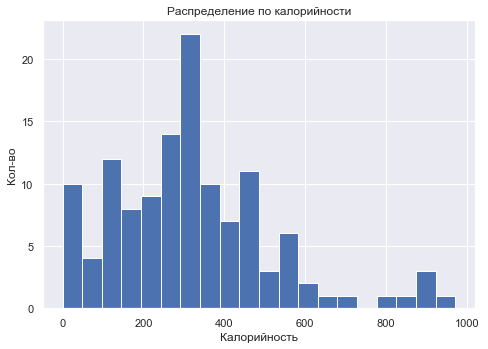

In [42]:
# распределение калорийности блюд 
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df4['Energy, kal'], bins = 20)
axes.set_title('Распределение по калорийности')
axes.set_ylabel('Кол-во')
axes.set_xlabel('Калорийность')

Text(0.5, 0, 'Вес блюда')

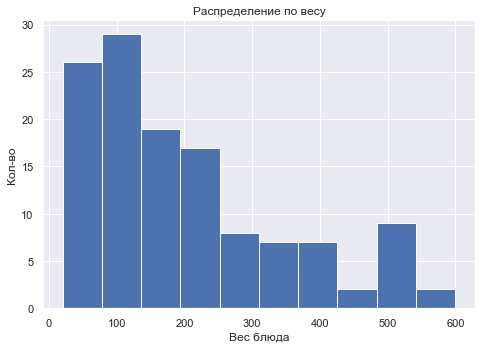

In [56]:
# Распределение по весу порции
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df4['Weight'], bins = 10)
axes.set_title('Распределение по весу')
axes.set_ylabel('Кол-во')
axes.set_xlabel('Вес блюда')

Прохладительные напитки               27
Блюда МакЗавтрак                      19
Продукция в упаковке производителя    18
Сэндвичи                              13
Выпечка                               12
Сезонные продукты                     11
Стартеры                              11
Маффины                                5
Пирожки и маффины                      4
Роллы                                  3
Картофель                              3
Name: Category, dtype: int64

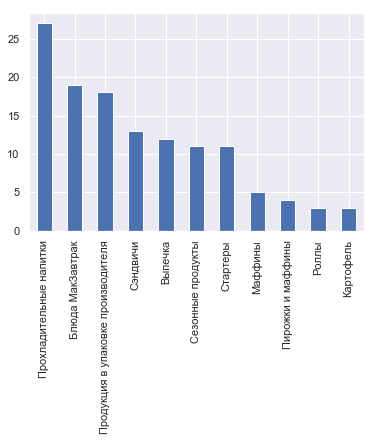

In [6]:
# Всего категорий и количество блюд
display(df['Category'].value_counts())
df['Category'].value_counts().plot.bar()

In [23]:
# датафреймы по категориям, для комбинации
main = df.loc[df['Category'].isin(['Сэндвичи', 'Стартеры', 'Роллы'])]
breakfast = df[df['Category']=='Блюда МакЗавтрак']
desert = df.loc[df['Category'].isin(['Выпечка', 'Маффины', 'Пирожки и маффины'])]
drinks = df.loc[df['Category']=='Прохладительные напитки']
free = df.loc[df['Category']=='Картофель']

In [123]:
# датафрейм с разрешенными напитками
drinks_allowed = drinks[drinks['Item'].str.contains('Чай') | drinks['Item'].str.contains('Сок')]
display(drinks_allowed)

,Category,Item,Weight,Protein,Fat,Carbon,"Energy, kal",Protein_,Fat_,Carbon_
30,Прохладительные напитки,Чай Липтон лимонный,400.0,0.0,0.0,27.0,107.0,0.0,0.0,27.0
31,Прохладительные напитки,Чай Липтон лимонный,500.0,0.0,0.0,34.0,134.0,0.0,0.0,34.0
32,Прохладительные напитки,Чай Липтон зеленый,400.0,0.0,0.0,27.0,107.0,0.0,0.0,27.0
33,Прохладительные напитки,Чай Липтон зеленый,500.0,0.0,0.0,34.0,134.0,0.0,0.0,34.0
42,Прохладительные напитки,Сок восстановленный яблочный,470.0,0.0,0.0,52.0,212.0,0.0,0.0,52.0
43,Прохладительные напитки,Сок восстановленный яблочный,600.0,0.0,0.0,66.0,270.0,0.0,0.0,66.0
44,Прохладительные напитки,Сок восстановленный апельсиновый,470.0,0.0,0.0,52.0,235.0,0.0,0.0,52.0
45,Прохладительные напитки,Сок восстановленный апельсиновый,600.0,0.0,0.0,66.0,300.0,0.0,0.0,66.0
46,Прохладительные напитки,Чай зеленый,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,Прохладительные напитки,Чай чёрный,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


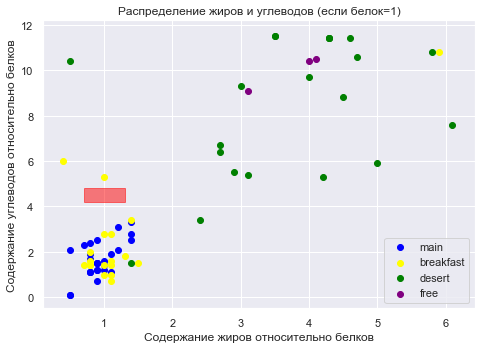

In [109]:
# распределение белков, жиров, и углеводов в разных категориях
fig = plt.figure()
rectangle = plt.Rectangle((0.7, 4.2), 0.6, 0.6, color='red', alpha=0.5) #примерная область нормы для подростков
axes = fig.add_axes([0, 0, 1, 1])
axes.add_artist(rectangle) #нарисовали область нормы
axes.set_title('Распределение жиров и углеводов (если белок=1)')
axes.set_xlabel('Содержание жиров относительно белков')
axes.set_ylabel('Содержание углеводов относительно белков')

axes.scatter(x = main['Fat_'], y = main['Carbon_'], marker = 'o', c='blue')
axes.scatter(x = breakfast['Fat_'], y = breakfast['Carbon_'], marker = 'o', c='yellow')
axes.scatter(x = desert['Fat_'], y = desert['Carbon_'], marker = 'o', c='green')
#axes.scatter(x = drinks_allowed['Fat_'], y = drinks_allowed['Carbon_'], marker = 'o', c='red')
axes.scatter(x = free['Fat_'], y = free['Carbon_'], marker = 'o', c='purple')

axes.legend(['main', 'breakfast', 'desert', 'free'])

Можно увидеть, что готовых сбалансированных блюд нет. В основных блюдах и завтраках не хватает углеводов, в десертах и картофеле избыточное содержание жиров и углеводов.
Требуется комбинация блюд

In [187]:
# функция для комбинации блюд из датафреймов
# возврашает ограниченный датафрейм
# по заданной энергетической ценности и пропорции Б:Ж:У
# пропорция 1:(0.7-1.3):(4.2-4.8)
# границы энергетической ценности для завтрака: 480-675
# границы энергетической ценности для обеда: 720-945
#
#
def combine(df1, df2, df3=None, switch=0): # switch - переключатель границ энергетической ценности для завтрака и обеда
    if switch==0: # завтрак
        x=480
        y=675
    if switch==1: # обед
        x=720
        y=945
    header = ['Item', 'Protein', 'Fat', 'Carbon', 'Energy, kal', 'Protein_', 'Fat_', 'Carbon_']
    data = []
    # делаем комбинации всех возможных блюд
    for row1 in df1.iterrows():
        for row2 in df2.iterrows():
            energy = row1[1]['Energy, kal'] + row2[1]['Energy, kal']
            if df3 is not None:
                for row3 in df3.iterrows():
                    energy = row1[1]['Energy, kal'] + row2[1]['Energy, kal'] + row3[1]['Energy, kal']
                    if energy>=x and energy<=y:
                        protein_new = row1[1]['P rotein'] + row2[1]['Protein'] +row3[1]['Protein']
                        fat_new = row1[1]['Fat'] + row2[1]['Fat'] + row3[1]['Fat']
                        carbon_new = row1[1]['Carbon'] + row2[1]['Carbon'] + row3[1]['Carbon']
                        protein_ = 1
                        fat_ = round(fat_new/protein_new, 1)
                        carbon_ = round(carbon_new/protein_new, 1)
                        data.append([row1[1]['Item']+' + '+row2[1]['Item']+' + '+row3[1]['Item'], 
                                     protein_new, fat_new, carbon_new, energy, protein_, fat_, carbon_])
            else:
                if energy>=x and energy<=y:
                        protein_new = row1[1]['Protein'] + row2[1]['Protein']
                        fat_new = row1[1]['Fat'] + row2[1]['Fat']
                        carbon_new = row1[1]['Carbon'] + row2[1]['Carbon']
                        protein_ = 1
                        fat_ = round(fat_new/protein_new, 1)
                        carbon_ = round(carbon_new/protein_new, 1)
                        data.append([row1[1]['Item']+' + '+row2[1]['Item'], 
                                     protein_new, fat_new, carbon_new, energy, protein_, fat_, carbon_])

    df = pd.DataFrame(data, columns=header)
    # возвращаем только те комбинации, которые укладываются в рамки пропорции
    return df[(df['Fat_']>=0.7) & 
                   (df['Fat_']<=1.3) &
                   (df['Carbon_']>=4.2) &
                   (df['Carbon_']<=4.8)]

In [188]:
# комбинация завтраков и десертов для завтака
break_comb = combine(breakfast, desert, switch=0) # 0 - завтрак, 1 - обед

In [189]:
display(break_comb)

,Item,Protein,Fat,Carbon,"Energy, kal",Protein_,Fat_,Carbon_
16,МакМаффин с яйцом и сыром + Маффин шоколадный ...,23.7,16.8,106.0,671.0,1,0.7,4.5


In [190]:
# комбинация основных блюд с десертом для обеда
lunch_comb = combine(main, desert, switch=1)

In [191]:
display(lunch_comb)

,Item,Protein,Fat,Carbon,"Energy, kal",Protein_,Fat_,Carbon_
53,Чиабатта с ветчиной и сыром + Маффин шоколадны...,28.7,20.8,130.0,822.0,1,0.7,4.5
134,Цезарь Ролл + Маффин шоколадный с черникой,27.7,27.8,122.0,854.0,1,1.0,4.4
209,Чизбургер Фреш + Маффин шоколадный с черникой,23.7,21.8,110.0,730.0,1,0.9,4.6


In [192]:
# комбинация завтрака с напитками для завтрака
breakfast_drinks = combine(breakfast, drinks_allowed, switch=0) # 0 - завтрак, 1 - обед
display(breakfast_drinks)

,Item,Protein,Fat,Carbon,"Energy, kal",Protein_,Fat_,Carbon_
5,МакМаффин с яйцом и ветчиной + Сок восстановле...,20.0,14.0,93.0,582.0,1,0.7,4.7
7,МакМаффин с яйцом и ветчиной + Сок восстановле...,20.0,14.0,93.0,612.0,1,0.7,4.7
8,МакМаффин с яйцом и беконом + Сок восстановлен...,18.0,15.0,78.0,529.0,1,0.8,4.3
10,МакМаффин с яйцом и беконом + Сок восстановлен...,18.0,15.0,78.0,552.0,1,0.8,4.3
12,МакМаффин со свиной котлетой + Сок восстановле...,18.0,18.0,78.0,556.0,1,1.0,4.3
14,МакМаффин со свиной котлетой + Сок восстановле...,18.0,18.0,78.0,579.0,1,1.0,4.3
33,Омлет + Сок восстановленный яблочный,18.0,14.0,78.0,517.0,1,0.8,4.3
35,Омлет + Сок восстановленный апельсиновый,18.0,14.0,78.0,540.0,1,0.8,4.3
57,Фреш МакМаффин + Сок восстановленный яблочный,18.0,20.0,80.0,580.0,1,1.1,4.4
59,Фреш МакМаффин + Сок восстановленный апельсиновый,18.0,20.0,80.0,603.0,1,1.1,4.4


In [200]:
# комбинация основных блюд с напитками для обеда
lunch_drinks = combine(main, drinks_allowed, switch=1) # 0 - завтрак, 1 - обед
display(lunch_drinks)

,Item,Protein,Fat,Carbon,"Energy, kal",Protein_,Fat_,Carbon_
0,Биг Мак + Сок восстановленный яблочный,26.0,25.0,108.0,773.0,1,1.0,4.2
2,Биг Мак + Сок восстановленный апельсиновый,26.0,25.0,108.0,803.0,1,1.0,4.2
14,Двойной Филе-О-Фиш + Сок восстановленный яблочный,26.0,21.0,111.0,748.0,1,0.8,4.3
15,Двойной Филе-О-Фиш + Сок восстановленный апель...,26.0,21.0,111.0,778.0,1,0.8,4.3


In [194]:
# комбинация завтрака с десертом и напитками для завтрака
break_comb_drinks = combine(breakfast, desert, df3=drinks_allowed, switch=0) # 0 - завтрак, 1 - обед
display(break_comb_drinks)

,Item,Protein,Fat,Carbon,"Energy, kal",Protein_,Fat_,Carbon_
0,"МакМаффин с яйцом и сыром + Пирожок ""Макдоналд...",18.8,25.0,85.0,645.0,1,1.3,4.5
2,"МакМаффин с яйцом и сыром + Пирожок ""Макдоналд...",18.8,25.0,85.0,645.0,1,1.3,4.5
7,МакМаффин с яйцом и сыром + Кекс Маффин шокола...,18.8,25.0,85.0,645.0,1,1.3,4.5
9,МакМаффин с яйцом и сыром + Кекс Маффин шокола...,18.8,25.0,85.0,645.0,1,1.3,4.5
14,МакМаффин с яйцом и сыром + Кекс Маффин ваниль...,18.8,25.0,85.0,645.0,1,1.3,4.5
16,МакМаффин с яйцом и сыром + Кекс Маффин ваниль...,18.8,25.0,85.0,645.0,1,1.3,4.5
68,МакМаффин с яйцом и сыром + Маффин шоколадный ...,23.7,16.8,106.0,671.0,1,0.7,4.5
69,МакМаффин с яйцом и сыром + Маффин шоколадный ...,23.7,16.8,106.0,671.0,1,0.7,4.5
70,МакМаффин с яйцом и сыром + Маффин шоколадный ...,23.7,16.8,106.0,671.0,1,0.7,4.5
399,Блины + Круассан с ветчиной и сыром + Чай Липт...,21.5,23.2,93.0,668.0,1,1.1,4.3


In [197]:
# комбинация основных блюд с десертом и напитками для обеда
lunch_comb_drinks = combine(main, desert, df3=drinks_allowed, switch=1) # 0 - завтрак, 1 - обед
display(lunch_comb_drinks)

,Item,Protein,Fat,Carbon,"Energy, kal",Protein_,Fat_,Carbon_
135,Гамбургер + Круассан с ветчиной и сыром + Сок ...,27.0,28.5,117.0,843.0,1,1.1,4.3
137,Гамбургер + Круассан с ветчиной и сыром + Сок ...,27.0,28.5,117.0,873.0,1,1.1,4.3
273,Чикенбургер + Круассан с ветчиной и сыром + Со...,26.0,35.0,110.0,871.0,1,1.3,4.2
274,Чикенбургер + Круассан с ветчиной и сыром + Со...,26.0,35.0,124.0,929.0,1,1.3,4.8
275,Чикенбургер + Круассан с ветчиной и сыром + Со...,26.0,35.0,110.0,894.0,1,1.3,4.2
399,"Чиабатта с ветчиной и сыром + Пирожок ""Макдона...",23.8,29.0,109.0,796.0,1,1.2,4.6
401,"Чиабатта с ветчиной и сыром + Пирожок ""Макдона...",23.8,29.0,109.0,796.0,1,1.2,4.6
405,Чиабатта с ветчиной и сыром + Кекс Маффин шоко...,23.8,29.0,109.0,796.0,1,1.2,4.6
407,Чиабатта с ветчиной и сыром + Кекс Маффин шоко...,23.8,29.0,109.0,796.0,1,1.2,4.6
411,Чиабатта с ветчиной и сыром + Кекс Маффин вани...,23.8,29.0,109.0,796.0,1,1.2,4.6


In [199]:
# собираем общий датафрейм для завтраков
breakfast_full = pd.concat([break_comb, breakfast_drinks, break_comb_drinks], ignore_index=True)
display(breakfast_full)

,Item,Protein,Fat,Carbon,"Energy, kal",Protein_,Fat_,Carbon_
0,МакМаффин с яйцом и сыром + Маффин шоколадный ...,23.7,16.8,106.0,671.0,1,0.7,4.5
1,МакМаффин с яйцом и ветчиной + Сок восстановле...,20.0,14.0,93.0,582.0,1,0.7,4.7
2,МакМаффин с яйцом и ветчиной + Сок восстановле...,20.0,14.0,93.0,612.0,1,0.7,4.7
3,МакМаффин с яйцом и беконом + Сок восстановлен...,18.0,15.0,78.0,529.0,1,0.8,4.3
4,МакМаффин с яйцом и беконом + Сок восстановлен...,18.0,15.0,78.0,552.0,1,0.8,4.3
5,МакМаффин со свиной котлетой + Сок восстановле...,18.0,18.0,78.0,556.0,1,1.0,4.3
6,МакМаффин со свиной котлетой + Сок восстановле...,18.0,18.0,78.0,579.0,1,1.0,4.3
7,Омлет + Сок восстановленный яблочный,18.0,14.0,78.0,517.0,1,0.8,4.3
8,Омлет + Сок восстановленный апельсиновый,18.0,14.0,78.0,540.0,1,0.8,4.3
9,Фреш МакМаффин + Сок восстановленный яблочный,18.0,20.0,80.0,580.0,1,1.1,4.4


In [202]:
breakfast_full.to_csv('D:\SF\McD_vs_Stbs/mac_breakfast_full.csv', index = False)

In [201]:
# собираем общий датафрейм для обедов
lunch_full = pd.concat([lunch_comb, lunch_drinks, lunch_comb_drinks], ignore_index=True)
display(lunch_full)

,Item,Protein,Fat,Carbon,"Energy, kal",Protein_,Fat_,Carbon_
0,Чиабатта с ветчиной и сыром + Маффин шоколадны...,28.7,20.8,130.0,822.0,1,0.7,4.5
1,Цезарь Ролл + Маффин шоколадный с черникой,27.7,27.8,122.0,854.0,1,1.0,4.4
2,Чизбургер Фреш + Маффин шоколадный с черникой,23.7,21.8,110.0,730.0,1,0.9,4.6
3,Биг Мак + Сок восстановленный яблочный,26.0,25.0,108.0,773.0,1,1.0,4.2
4,Биг Мак + Сок восстановленный апельсиновый,26.0,25.0,108.0,803.0,1,1.0,4.2
5,Двойной Филе-О-Фиш + Сок восстановленный яблочный,26.0,21.0,111.0,748.0,1,0.8,4.3
6,Двойной Филе-О-Фиш + Сок восстановленный апель...,26.0,21.0,111.0,778.0,1,0.8,4.3
7,Гамбургер + Круассан с ветчиной и сыром + Сок ...,27.0,28.5,117.0,843.0,1,1.1,4.3
8,Гамбургер + Круассан с ветчиной и сыром + Сок ...,27.0,28.5,117.0,873.0,1,1.1,4.3
9,Чикенбургер + Круассан с ветчиной и сыром + Со...,26.0,35.0,110.0,871.0,1,1.3,4.2


In [203]:
lunch_full.to_csv('D:\SF\McD_vs_Stbs/mac_lunch_full.csv', index = False)

In [115]:
header = ['Product', 'Yes', 'No']
data = []
def qwer(col):
    name = col.name
    seria = col.value_counts()
    no = seria['no']
    yes = seria['yes']
    data.append([name, yes, no])
    
df2.iloc[:, 10:20].apply(qwer, axis=0)
prod = pd.DataFrame(data, columns=header)

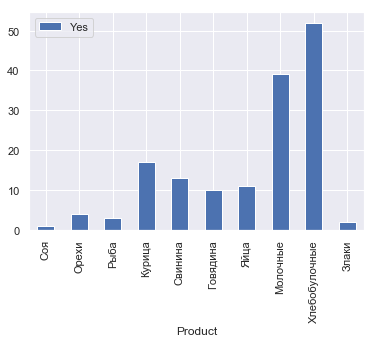

In [124]:
prod.plot.bar(x='Product', y='Yes')